# Example StreamingSolver usage

In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
%matplotlib notebook

Import the module implementing the solver

In [33]:
import psitools
from psitools.taus_gridding import get_gridding 
from psitools.taus_gridding import gridmap

## First example

In [34]:
ntaus = 257 #number of dust grid points

tsint = (1e-9, 1e-2)
epstot = 3.0
beta = -3.5
Kx = Kz = 1e3

a Chebyshev Roots grid - but the choice does matter, taus_gridding implements utilities for some griddings. There's an internal mapping which shows what's implemented:

In [35]:
print(gridmap.keys())

dict_keys(['linear', 'logarithmic', 'chebyshev', 'logchebyshev', 'chebyshevroots', 'logchebyshevroots'])


In [36]:
taus = get_gridding(gridmap['chebyshevroots'], tsint, ntaus)

A power-law dust dist solver

In [37]:
ss = psitools.direct.StreamingSolver(taus, epstot=epstot, beta=beta, alpha=None)

Building the matrix is a sperate call, takes the nondimensional wavenumbers, 
$\eta$ (default 0.05) is used to dimensionalize internally

In [38]:
ss.build_system_matrix(Kx=Kx, Kz=Kz)

The call to scipy.linang.eig is made through this call, which stores the results inside the object.

In [39]:
ss.solve_eigen()
print(ss.eigenvalues)

[1.25377029-1.07887528e+07j 0.45599359-1.07887537e+07j
 2.051547  -1.07887537e+07j ... 0.39178359+3.80534035e-04j
 0.36802027+3.46876412e-04j 0.34406512+3.13290764e-04j]


To return the fastest growing eigenvalue:

In [40]:
print(ss.get_fastest_growth())

(0.5099872860602924+0.19437187078904652j)


## Second example

 Solve at a series of resolutions, a growing mode, and then with alpha.

In [41]:
importlib.reload(psitools)
epstot = 3.0
tsint = [1e-8, 1e-1]

Kx = 50
Kz = 100.0

sl = []
for ll in range(4,9):
    ss = psitools.direct.StreamingSolver(get_gridding(gridmap['chebyshevroots'],
                                                      tsint, 2**ll+1),
                                         epstot=epstot) 
    ss.build_system_matrix(Kx=Kx, Kz=Kz) 
    ss.solve_eigen()
    sl.append(ss)

With turbulence alpha

In [42]:
slt = []
for ll in range(4, 9):
    st = psitools.direct.StreamingSolver(get_gridding(gridmap['chebyshevroots'],
                                                      tsint, 2**ll+1),
                                         epstot=epstot, alpha=1e-7) 
    st.build_system_matrix(Kx, Kz) 
    st.solve_eigen()
    slt.append(st)

Plot dust eigenfunctions, they are smooth here as it's not a false root of the dispersion relation sitting near the branch cut.

<IPython.core.display.Javascript object>


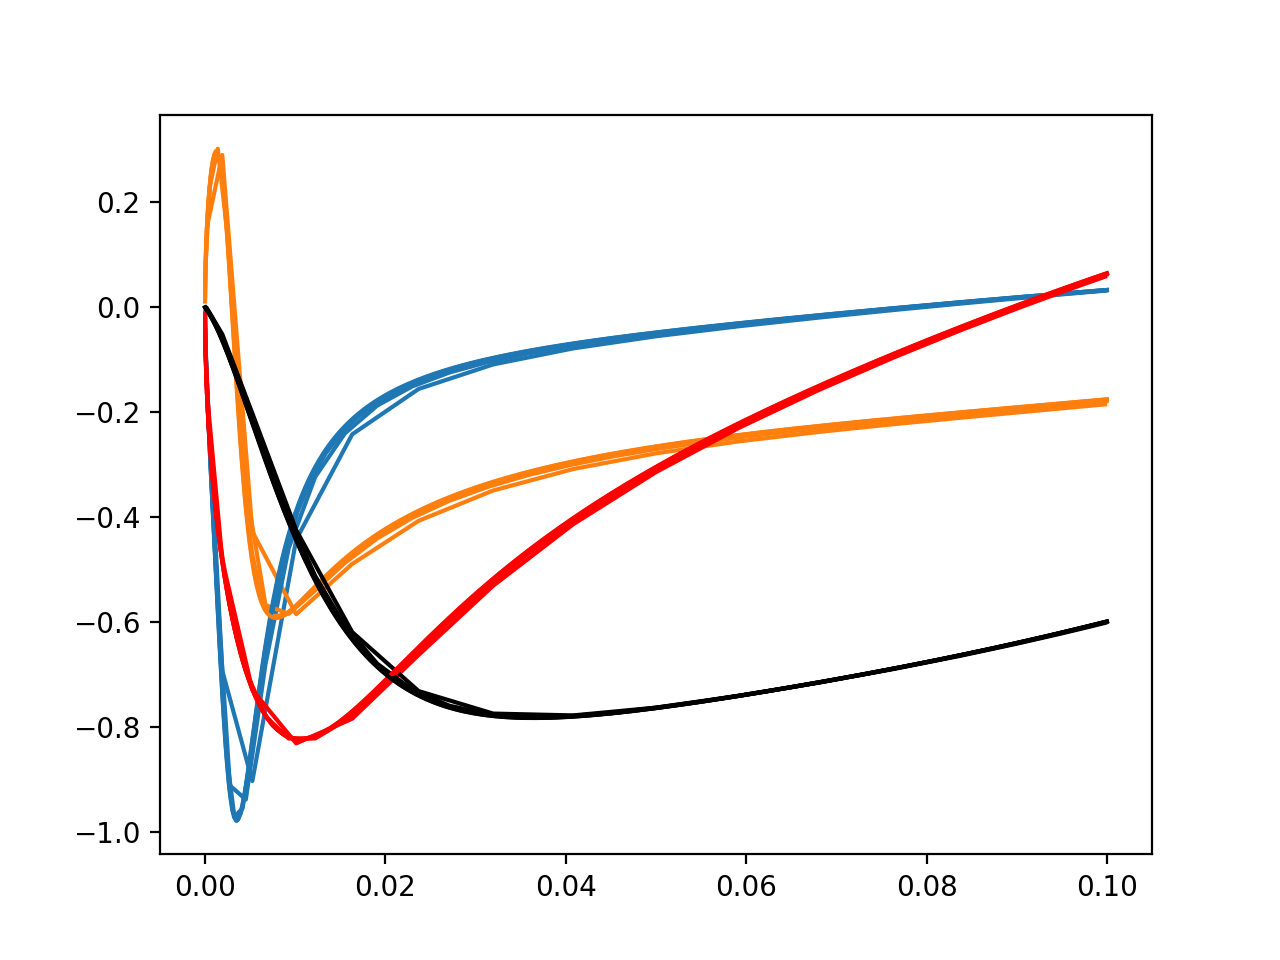

In [43]:
plt.figure()
for si, ss in enumerate(sl):
    plt.plot(ss.taus, ss.fastest_eigenvec_by_taus['sig'].real, color='C0')
    plt.plot(ss.taus, ss.fastest_eigenvec_by_taus['sig'].imag, color='C1')
for si, st in enumerate(slt):
    plt.plot(st.taus, st.fastest_eigenvec_by_taus['sig'].real, color='red')
    plt.plot(st.taus, st.fastest_eigenvec_by_taus['sig'].imag, color='black')
plt.show()

Growth rates are way down for that $\alpha$.

<IPython.core.display.Javascript object>


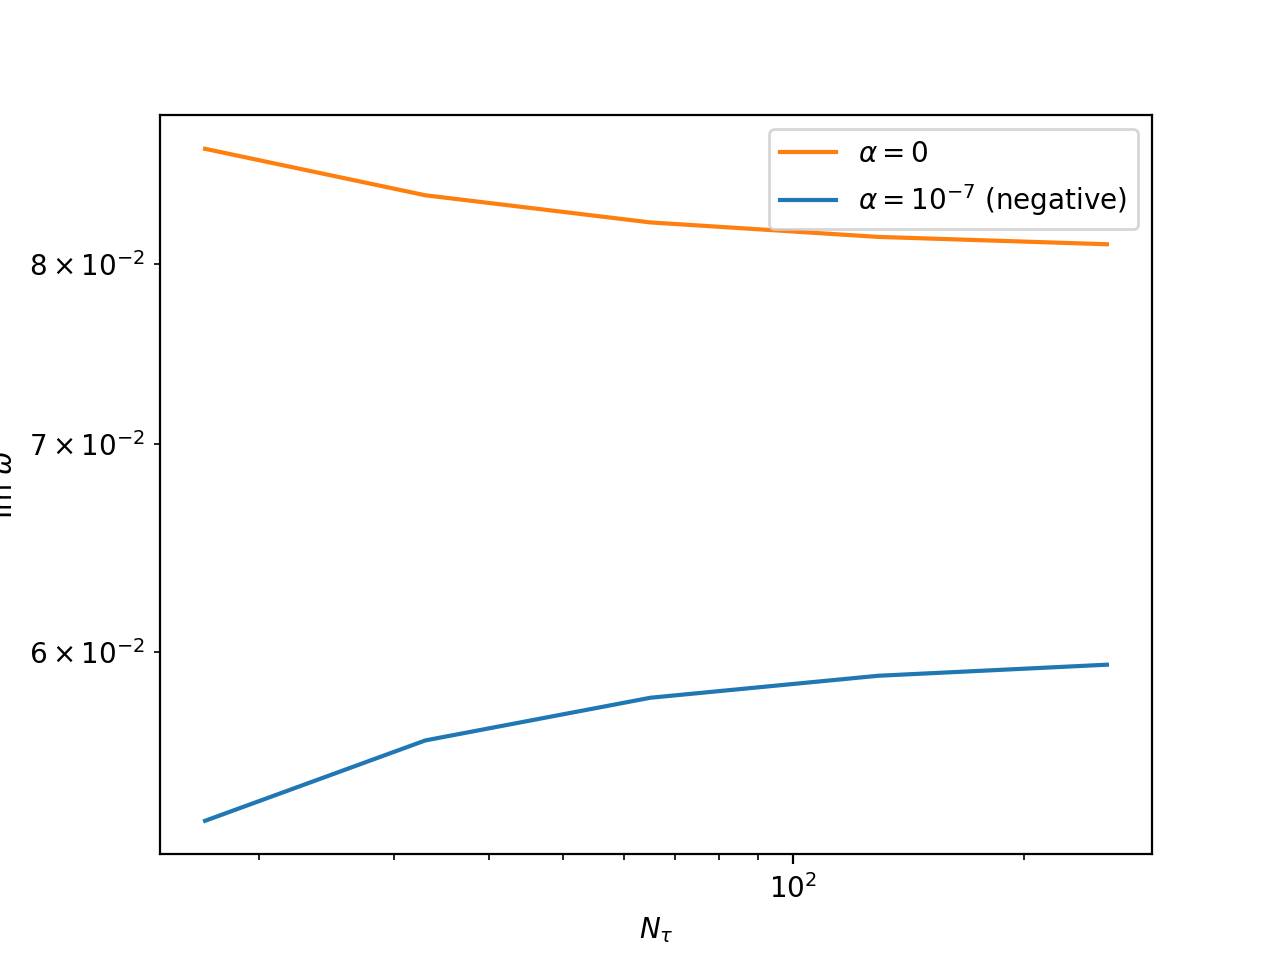

In [44]:
plt.figure()
plt.loglog([len(ss.taus) for ss in sl], [ss.get_fastest_growth().imag for ss in sl],color='C1',
           label = "$\\alpha=0$")
plt.loglog([len(st.taus) for st in slt], [abs(st.get_fastest_growth().imag) for st in slt],color='C0',
           label = "$\\alpha=10^{-7}$ (negative)")
plt.legend()
plt.xlabel("$N_\\tau$")
plt.ylabel("Im $\\omega$")
plt.show()

## Third example

Running a converger process, dumps to pickle.

In [45]:
ait = psitools.direct.Converger((1e-4, 1e-3), 0.1, -3.5, 691.0, 1000.0, ll=6, refine=3,
                                gridding='chebyshevroots', prefix='test')
ait.runcompute()

Writing  test/converger_cbdd317facc124cf979ddb358e0c1444.pickle


FileNotFoundError: [Errno 2] No such file or directory: 'test/converger_cbdd317facc124cf979ddb358e0c1444.pickle'